<a href="https://colab.research.google.com/github/YoshifumiMiyagi/EDV_3D/blob/main/EDV3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
SEED = 42

import numpy as np
import pandas as pd
import codecs

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [6]:
with codecs.open("/content/drive/MyDrive/EDV3D_R5_12_14_DB1.csv", "r", "Shift-JIS", "ignore") as file:
    raw = pd.read_table(file, delimiter=",")
raw

,EDV_3D,SEX,Age (years)_1,Body weight (kg),Height (cm),BSA (m2)_Dubois,SBP mmHg,DBP mmHg,HR bpm,Base,...,MVE cm/s,TVE cm/sed,IVSe,IVS_s,Lve,LVs,Tve,TVs,AseVp,IVC
0,55.5,F,8.900000,30.00,130.0,1.039326,85.0,50.0,110.0,-28.0,...,114.00,62.0,17.00,8.00,26.00,12,17.80,14.20,NaN,10.90
1,54.8,M,13.720548,37.55,152.8,1.285479,105.0,45.0,50.0,-25.0,...,103.60,NaN,13.30,8.47,27.60,8.69,22.60,13.40,117.00,21.23
2,49.5,M,12.290411,40.20,151.3,1.313849,109.0,51.0,69.0,-28.0,...,95.25,72.2,15.18,7.24,18.89,8.87,17.66,12.17,134.41,20.20
3,48.7,M,8.641096,28.90,137.5,1.065411,108.0,42.0,61.0,-24.0,...,121.00,87.0,12.09,6.54,19.31,9.66,13.97,10.76,101.84,19.20
4,73.0,M,14.317808,54.40,169.0,1.618876,138.0,71.0,62.0,-26.0,...,96.90,65.4,13.54,6.71,22.10,11.22,16.17,14.02,102.61,18.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NaN,M,3.345000,13.95,97.7,0.610216,77.0,51.0,93.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,NaN,M,6.284932,20.50,113.0,0.798626,94.0,49.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,M,7.263014,23.95,118.8,0.884735,104.0,60.0,82.0,-27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,M,8.016438,33.40,125.5,1.060414,86.0,47.0,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = raw.dropna(subset="EDV_3D")
df['SEX'] = df['SEX'].replace(['M', 'F'], [0, 1])
df

<ipython-input-37-e970c36ccd25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEX'] = df['SEX'].replace(['M', 'F'], [0, 1])


,EDV_3D,SEX,Age (years)_1,Body weight (kg),Height (cm),BSA (m2)_Dubois,SBP mmHg,DBP mmHg,HR bpm,Base,...,MVE cm/s,TVE cm/sed,IVSe,IVS_s,Lve,LVs,Tve,TVs,AseVp,IVC
0,55.5,1,8.900000,30.000,130.000,1.039326,85.0,50.0,110.0,-28.0,...,114.00,62.00,17.00,8.00,26.00,12,17.80,14.20,NaN,10.90
1,54.8,0,13.720548,37.550,152.800,1.285479,105.0,45.0,50.0,-25.0,...,103.60,NaN,13.30,8.47,27.60,8.69,22.60,13.40,117.00,21.23
2,49.5,0,12.290411,40.200,151.300,1.313849,109.0,51.0,69.0,-28.0,...,95.25,72.20,15.18,7.24,18.89,8.87,17.66,12.17,134.41,20.20
3,48.7,0,8.641096,28.900,137.500,1.065411,108.0,42.0,61.0,-24.0,...,121.00,87.00,12.09,6.54,19.31,9.66,13.97,10.76,101.84,19.20
4,73.0,0,14.317808,54.400,169.000,1.618876,138.0,71.0,62.0,-26.0,...,96.90,65.40,13.54,6.71,22.10,11.22,16.17,14.02,102.61,18.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,4.3,0,0.000000,2.938,51.000,0.196461,66.0,35.0,108.0,-27.0,...,61.58,39.25,5.75,4.92,9.75,5.75,9.65,7.23,71.18,NaN
466,3.4,0,0.000000,50.000,3.056,0.085146,76.0,39.0,136.0,-29.0,...,64.85,49.13,6.35,5.08,7.70,6.35,7.38,8.12,66.19,NaN
467,3.3,0,0.000000,51.000,3.532,0.095367,84.0,52.0,100.0,-19.0,...,39.68,62.07,4.37,3.67,7.52,4.56,5.65,5.04,64.18,NaN
468,3.5,1,0.000000,3.366,53.000,0.214037,79.0,38.0,140.0,-17.0,...,50.67,50.32,5.96,3.74,6.19,5.57,8.66,5.88,59.49,NaN


In [42]:
df["Avring"] = pd.to_numeric(df["Avring"], errors="coerce")
df["Pvring"] = pd.to_numeric(df["Pvring"], errors="coerce")
df["2D_LVESV"] = pd.to_numeric(df["2D_LVESV"], errors="coerce")
df["LVs"] = pd.to_numeric(df["LVs"], errors="coerce")

<ipython-input-42-ff7348bc8888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Avring"] = pd.to_numeric(df["Avring"], errors="coerce")
<ipython-input-42-ff7348bc8888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pvring"] = pd.to_numeric(df["Pvring"], errors="coerce")
<ipython-input-42-ff7348bc8888>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 469
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDV_3D            447 non-null    float64
 1   SEX               447 non-null    int64  
 2   Age (years)_1     447 non-null    float64
 3   Body weight (kg)  447 non-null    float64
 4   Height (cm)       447 non-null    float64
 5   BSA (m2)_Dubois   447 non-null    float64
 6   SBP mmHg          422 non-null    float64
 7   DBP mmHg          421 non-null    float64
 8   HR bpm            432 non-null    float64
 9   Base              434 non-null    float64
 10  Mid               436 non-null    float64
 11  Apex              425 non-null    float64
 12  LVPWs             416 non-null    float64
 13  LVDs              431 non-null    float64
 14  IVSs              417 non-null    float64
 15  LVPWd             429 non-null    float64
 16  LVDd              429 non-null    float64
 1

<ipython-input-44-c834b66031f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EDV_3D'])


count    447.000000
mean      28.577405
std       25.713138
min        2.500000
25%        4.300000
50%       29.000000
75%       47.300000
max      142.500000
Name: EDV_3D, dtype: float64
skewness: 0.693
kurtsis: -0.0449


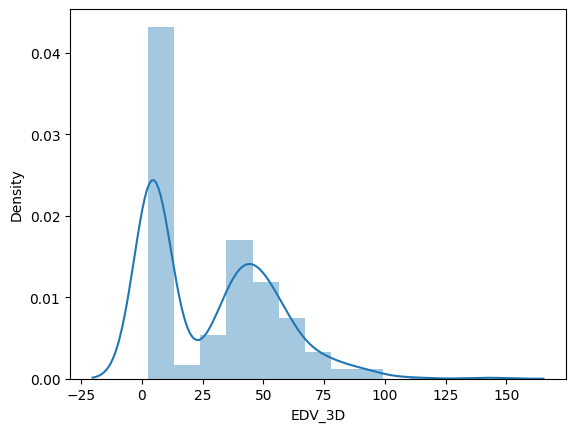

In [44]:
sns.distplot(df['EDV_3D'])
print(df["EDV_3D"].describe())
print(f"skewness: {round(df['EDV_3D'].skew(),4)}" )
print(f"kurtsis: {round(df['EDV_3D'].kurt(),4)}" )

<ipython-input-13-b4b8a76ebaa2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age (years)_1'])


<Axes: xlabel='Age (years)_1', ylabel='Density'>

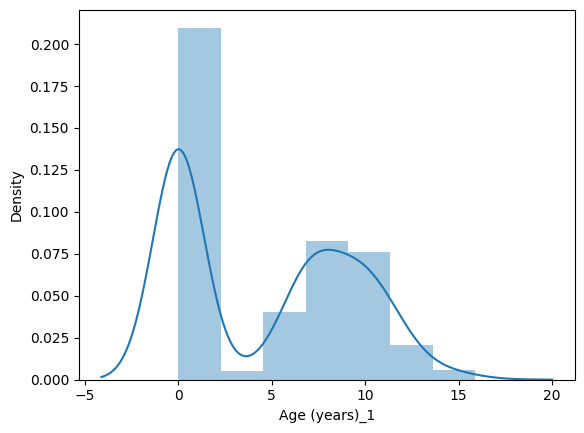

In [13]:
sns.distplot(df['Age (years)_1'])

<Axes: >

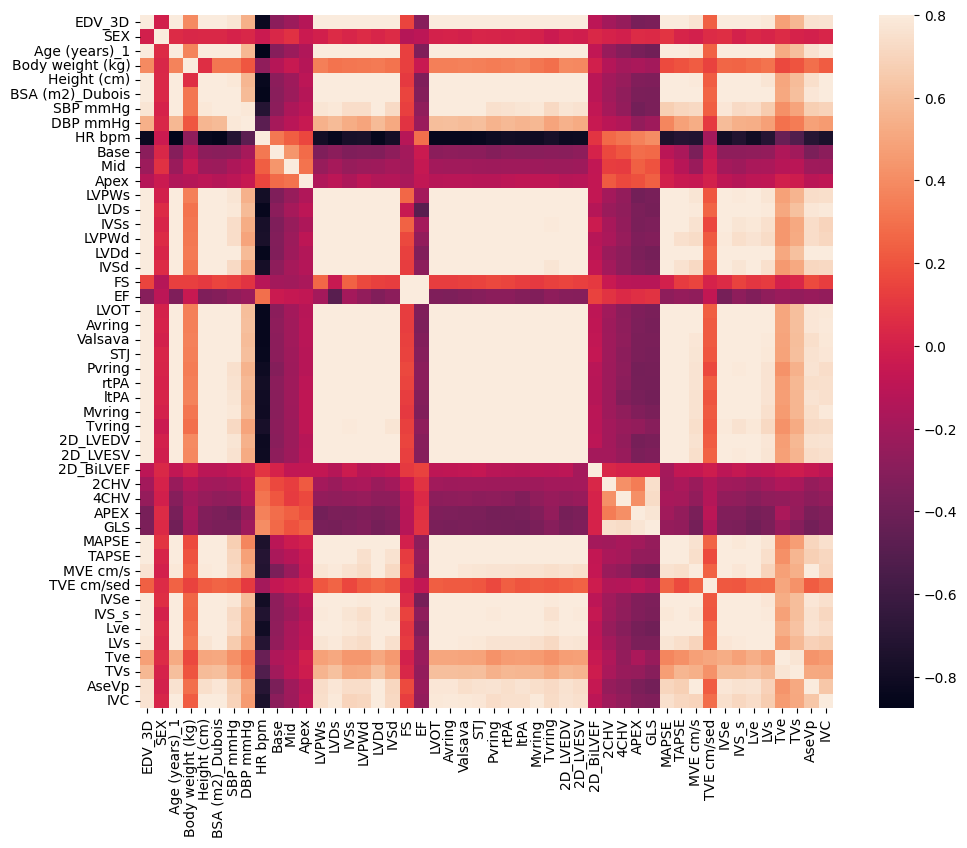

In [45]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [46]:
cor = pd.DataFrame(df.corr()["EDV_3D"].sort_values(ascending = False))
cor.columns = ["Correlation"]
cor[0:20]

,Correlation
EDV_3D,1.000000
2D_LVEDV,0.992922
2D_LVESV,0.988261
BSA (m2)_Dubois,0.953192
Age (years)_1,0.930190
Avring,0.926317
Valsava,0.925527
LVOT,0.922735
LVDd,0.914781
STJ,0.913791


In [18]:
df.isnull().sum()

EDV_3D                0
SEX                   0
Age (years)_1         0
Body weight (kg)      0
Height (cm)           0
BSA (m2)_Dubois       0
SBP mmHg             25
DBP mmHg             26
HR bpm               15
Base                 13
Mid                  11
Apex                 22
LVPWs                31
LVDs                 16
IVSs                 30
LVPWd                18
LVDd                 18
IVSd                 18
FS                   29
EF                   29
LVOT                  1
Avring                1
Valsava               1
STJ                   1
Pvring                4
rtPA                  8
ltPA                  8
Mvring                1
Tvring                1
2D_LVEDV              0
2D_LVESV              0
2D_BiLVEF             0
2CHV                 14
4CHV                 14
APEX                 21
GLS                  21
MAPSE               187
TAPSE               150
MVE cm/s              3
TVE cm/sed           16
IVSe                  7
IVS_s           

In [49]:
imp_mean = IterativeImputer(random_state=SEED)
DF = imp_mean.fit_transform(df)
DF = pd.DataFrame(DF, columns = df.columns)
DF

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,EDV_3D,SEX,Age (years)_1,Body weight (kg),Height (cm),BSA (m2)_Dubois,SBP mmHg,DBP mmHg,HR bpm,Base,...,MVE cm/s,TVE cm/sed,IVSe,IVS_s,Lve,LVs,Tve,TVs,AseVp,IVC
0,55.5,1.0,8.900000,30.000,130.000,1.039326,85.0,50.0,110.000000,-28.0,...,114.00,62.000000,17.00,8.00,26.00,12.00,17.80,14.20,122.796239,10.900000
1,54.8,0.0,13.720548,37.550,152.800,1.285479,105.0,45.0,50.000000,-25.0,...,103.60,78.122342,13.30,8.47,27.60,8.69,22.60,13.40,117.000000,21.230000
2,49.5,0.0,12.290411,40.200,151.300,1.313849,109.0,51.0,69.000000,-28.0,...,95.25,72.200000,15.18,7.24,18.89,8.87,17.66,12.17,134.410000,20.200000
3,48.7,0.0,8.641096,28.900,137.500,1.065411,108.0,42.0,61.000000,-24.0,...,121.00,87.000000,12.09,6.54,19.31,9.66,13.97,10.76,101.840000,19.200000
4,73.0,0.0,14.317808,54.400,169.000,1.618876,138.0,71.0,62.000000,-26.0,...,96.90,65.400000,13.54,6.71,22.10,11.22,16.17,14.02,102.610000,18.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,4.3,0.0,0.000000,2.938,51.000,0.196461,66.0,35.0,108.000000,-27.0,...,61.58,39.250000,5.75,4.92,9.75,5.75,9.65,7.23,71.180000,4.783766
443,3.4,0.0,0.000000,50.000,3.056,0.085146,76.0,39.0,136.000000,-29.0,...,64.85,49.130000,6.35,5.08,7.70,6.35,7.38,8.12,66.190000,3.655343
444,3.3,0.0,0.000000,51.000,3.532,0.095367,84.0,52.0,100.000000,-19.0,...,39.68,62.070000,4.37,3.67,7.52,4.56,5.65,5.04,64.180000,4.123084
445,3.5,1.0,0.000000,3.366,53.000,0.214037,79.0,38.0,140.000000,-17.0,...,50.67,50.320000,5.96,3.74,6.19,5.57,8.66,5.88,59.490000,4.298847


# VIF

In [55]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
X = scaler.fit_transform(DF.select_dtypes(include = ["int64", "float64"]).drop("EDV_3D", axis = 1))

X = pd.DataFrame(X, columns = list(DF.select_dtypes(include = ["int64", "float64"]).drop("EDV_3D", axis = 1)))

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,SEX,1.182457
1,Age (years)_1,51.397402
2,Body weight (kg),44.283948
3,Height (cm),540.804543
4,BSA (m2)_Dubois,369.961163
5,SBP mmHg,7.008011
6,DBP mmHg,3.399632
7,HR bpm,5.720677
8,Base,1.566655
9,Mid,1.474239


# Model

In [56]:
x = DF.drop("EDV_3D", axis = 1)
y = DF["EDV_3D"]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

In [64]:
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)

pred = lgbm.predict(x_test)
print(r2_score(pred, y_test))
#print(mean_absolute_error(pred, y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4121
[LightGBM] [Info] Number of data points in the train set: 357, number of used features: 47
[LightGBM] [Info] Start training from score 28.245658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [74]:
importance = pd.DataFrame(lgbm.feature_importances_, index=x.columns, columns=['importance']).sort_values('importance', ascending=False)
display(importance)

,importance
2D_LVEDV,192
IVSe,81
2D_LVESV,71
Mvring,59
Pvring,45
IVSd,44
TAPSE,42
IVS_s,39
2D_BiLVEF,38
Tvring,37
